In [56]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [57]:
data1 = sio.loadmat('ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [58]:
X = data1['X']
X.shape

(300, 2)

<function matplotlib.pyplot.show(*args, **kw)>

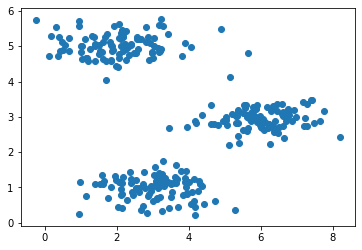

In [59]:
plt.scatter(X[:,0],X[:,1])
plt.show

# 1.获取每个样本所属的类别

In [60]:
##不是很懂哦 害

def find_centroids(X,centros):
    
    idx = []
    
    for i in range(len(X)):
        dist = np.linalg.norm((X[i] - centros),axis = 1)
        id_i = np.argmin(dist)
        idx.append(id_i)
        
    return np.array(idx)
    

In [61]:
centros = np.array([[3,3],[6,2],[8,5]])
idx = find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

# 2.计算聚类中心点

In [62]:
def compute_centros(X,idx,k):
    
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis = 0)
        centros.append(centros_i)
        
    return np.array(centros)

In [63]:
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

# 3.运行kmeans，重复执行1和2

In [64]:
def run_kmeans(X,centros,iters):
    k= len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X, idx,k)
        centros_all.append(centros_i)
    return idx,np.array(centros_all)

# 绘制数据集和聚类中心的移动轨迹

In [65]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c = idx, cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

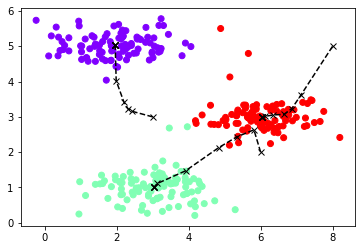

In [70]:
idx,centros_all = run_kmeans(X,centros,iters = 10)
plot_data(X,centros_all,idx)

# 观察初始聚类点的位置对聚类效果的影响

In [67]:

def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [68]:
init_centros(X,k = 3)

array([[2.15460139, 5.46282959],
       [2.07291709, 1.16763851],
       [3.1342801 , 4.96178114]])

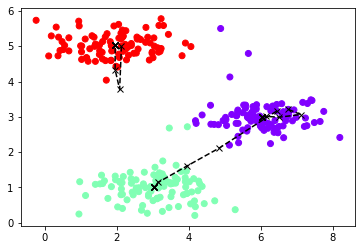

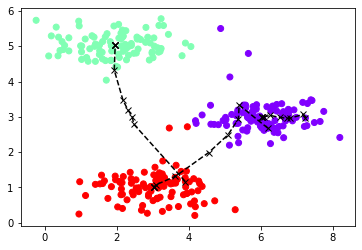

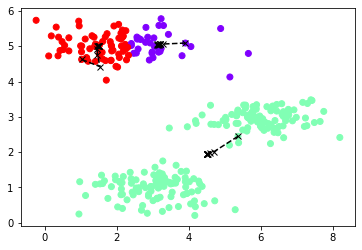

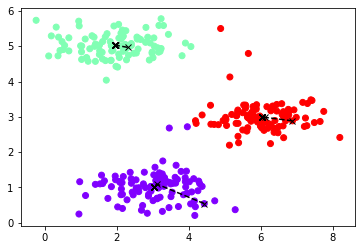

In [71]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters = 10)
    plot_data(X,centros_all,idx)